In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


import sys, sklearn
np.random.seed(42)

print("Python:", sys.version.split()[0])
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)

Python: 3.12.4
NumPy: 1.26.4
Pandas: 2.2.2
scikit-learn: 1.4.2


## 1.1 Fundamentos de la técnica

K-Means es un **algoritmo no supervisado** que agrupa los datos en **K clusters** según su similitud.  
Funciona **iterativamente**, buscando los **centroides** que minimizan la **distancia promedio (euclidiana)** entre los puntos y su centro.

- No utiliza etiquetas reales para entrenar, solo las **variables de entrada**.  
- Es útil para **descubrir patrones ocultos** o **segmentar datos**.  
- El valor de **K** debe elegirse previamente (por ejemplo, con el **método del codo**).

---

## 1.2 Modelo Matemático

\[
J = \sum_{i=1}^{K} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2
\]

Donde:

- \( C_i \): conjunto de puntos asignados al clúster *i*  
- \( \mu_i \): centroide del clúster *i*  
- \( \| \cdot \| \): norma euclidiana  

**Proceso iterativo:**
1. Inicializar *K* centroides aleatorios  
2. Asignar cada punto al centroide más cercano  
3. Recalcular centroides como el promedio de sus puntos  
4. Repetir hasta convergencia (sin cambios o máximo de iteraciones)

---

## 1.3 Librerías, clases y funciones empleadas

| Módulo | Propósito |
|--------|------------|
| `sklearn.cluster.KMeans` | Implementación de K-Means |
| `StandardScaler` | Escala variables (evita que una domine por magnitud) |
| `confusion_matrix`, `accuracy_score` | Comparan clusters vs etiquetas reales (para evaluación didáctica) |
| `seaborn`, `matplotlib` | Visualización |

---  


In [4]:
'''
1.4 Pipeline — paso a paso
1.4.1 Preprocesamiento

Usaremos el dataset Iris, que tiene tres clases reales (Setosa, Versicolor, Virginica).
Aunque K-Means es no supervisado, compararemos los clusters con las clases reales para evaluar resultados
'''
iris = load_iris(as_frame=True)
df = iris.frame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#Estadísticos básicos:
print("Resumen estadístico:\n")
print(df.describe().T)


Resumen estadístico:

                   count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
target             150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0


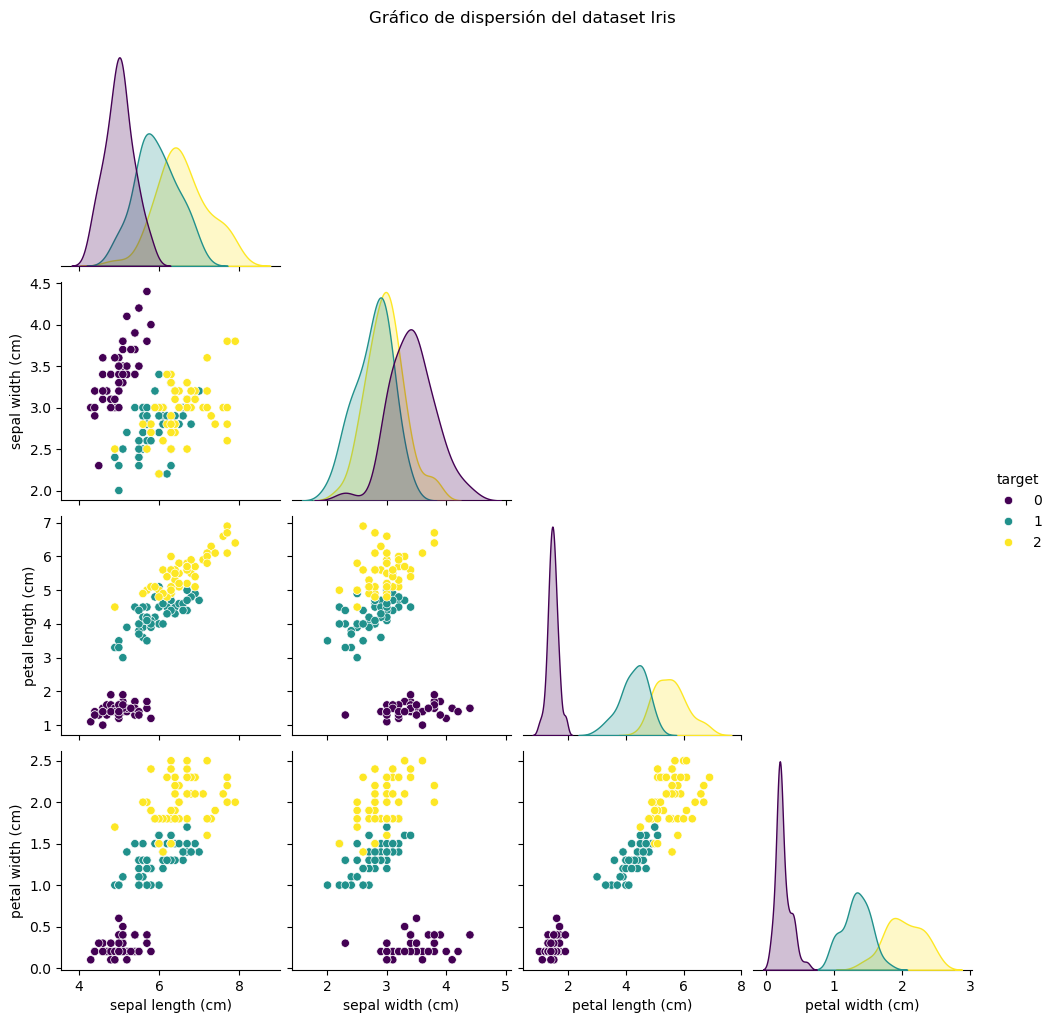

In [7]:
#Gráfico de dispersión:
sns.pairplot(df, hue="target", diag_kind="kde", corner=True, palette="viridis")
plt.suptitle("Gráfico de dispersión del dataset Iris", y=1.02)
plt.show()


In [13]:
'''
1.4.2 Entrenamiento del modelo K-Means

Aplicamos K-Means con k = 3 (porque sabemos que el dataset tiene 3 especies).
'''
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Entrenamiento del modelo K-Means
X = df[iris.feature_names].values
y_true = df["target"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_scaled)

print("Centroides encontrados:\n", kmeans.cluster_centers_)


C:\Users\adpj8\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Centroides encontrados:
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


##¿Qué representan los centroides?

Cada **fila del resultado** corresponde al **centro de un clúster**, definido por las coordenadas promedio de sus puntos en el **espacio de características estandarizado**.  
En este caso, cada centro tiene **4 valores**, uno por cada característica del dataset *Iris* (ya escaladas):

| Cluster | Sepal Length | Sepal Width | Petal Length | Petal Width |
|----------|---------------|--------------|---------------|--------------|
| 0 | -0.05 | -0.88 | 0.35 | 0.28 |
| 1 | -1.01 | 0.85 | -1.30 | -1.25 |
| 2 | 1.13 | 0.08 | 0.99 | 1.01 |

Estos **centroides** representan el **punto medio** de cada grupo dentro del espacio normalizado (media 0, desviación estándar 1).

Si **desescalas** estos valores (usando el inverso del `StandardScaler`), obtendrías las **medias reales** de las características en unidades originales — por ejemplo, centímetros de los sépalos y pétalos — para cada grupo identificado.


## Referencias Bibliográficas

- **MacQueen, J. (1967).** *Some Methods for Classification and Analysis of Multivariate Observations.* University of California Press.  
- **Bishop, C. M. (2006).** *Pattern Recognition and Machine Learning.* Springer.  
- **Hastie, T., Tibshirani, R., & Friedman, J. (2009).** *The Elements of Statistical Learning.* Springer.  
- **Documentación oficial:** [Scikit-learn — KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
